# Installing packages

In [ ]:
%pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install google-cloud-dialogflow
%pip install google-api-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import re
from google.colab import drive
from numpy.core.numeric import indices
from io import BytesIO
import requests

# nltk
import nltk
from urllib import request
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.collocations import *
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#Surprise
from surprise import Reader
from surprise import Dataset
from surprise import NormalPredictor
from surprise import KNNBasic, KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Importing the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
description = pd.read_csv("/content/drive/MyDrive/Book_rec/Goodreadss_Books.csv")
description.head()

,id,bookId,title,author,series,description,genres,awards,characters,places,...,publish_date,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",...,September 16th 2006,652.0,2553909.0,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,Sep-04,870.0,2631427.0,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",...,November 1st 2003,309.0,7434783.0,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",...,November 1st 2003,352.0,2878196.0,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,May 1st 2004,435.0,2972519.0,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0


In [ ]:
books = pd.read_csv("/content/drive/MyDrive/Book_rec/books.csv")
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
rating = pd.read_csv('/content/drive/MyDrive/Book_rec/ratings.csv')
rating.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


# Content-based recommendation system

## Manipulate the data

In [ ]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [ ]:
df = books[['book_id','title','ratings_count','image_url']]
df

,book_id,title,ratings_count,image_url
0,2767052,"The Hunger Games (The Hunger Games, #1)",4780653,https://images.gr-assets.com/books/1447303603m...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,https://images.gr-assets.com/books/1474154022m...
2,41865,"Twilight (Twilight, #1)",3866839,https://images.gr-assets.com/books/1361039443m...
3,2657,To Kill a Mockingbird,3198671,https://images.gr-assets.com/books/1361975680m...
4,4671,The Great Gatsby,2683664,https://images.gr-assets.com/books/1490528560m...
...,...,...,...,...
9995,7130616,"Bayou Moon (The Edge, #2)",17204,https://images.gr-assets.com/books/1307445460m...
9996,208324,"Means of Ascent (The Years of Lyndon Johnson, #2)",12582,https://s.gr-assets.com/assets/nophoto/book/11...
9997,77431,The Mauritius Command,9421,https://images.gr-assets.com/books/1455373531m...
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...,11279,https://images.gr-assets.com/books/1279214118m...


In [ ]:
df2 = description[['bookId','description']]
df2.rename(columns= {'bookId':'book_id'}, inplace = True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,book_id,description
0,1,The war against Voldemort is not going well; e...
1,2,There is a door at the end of a silent corrido...
2,3,Harry Potter's life is miserable. His parents ...
3,4,The Dursleys were so mean and hideous that sum...
4,5,"For twelve long years, the dread fortress of A..."
...,...,...
20063,19996,"A brief introduction to the history, geography..."
20064,19997,In a medieval kingdom both like and unlike 13t...
20065,19998,Narrated by the irrepressible chambermaid to a...
20066,19999,"From School Library Journal,Adult/High School-..."


## Content-based recommendation dataset

In [ ]:
CB_data = pd.merge(df,df2,on = "book_id", how = 'inner')
CB_data

,book_id,title,ratings_count,image_url,description
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,https://images.gr-assets.com/books/1474154022m...,Harry Potter's life is miserable. His parents ...
1,2657,To Kill a Mockingbird,3198671,https://images.gr-assets.com/books/1361975680m...,The unforgettable novel of a childhood in a sl...
2,4671,The Great Gatsby,2683664,https://images.gr-assets.com/books/1490528560m...,Alternate Cover Edition ISBN: 0743273567 ISBN1...
3,5907,The Hobbit,2071616,https://images.gr-assets.com/books/1372847500m...,In a hole in the ground there lived a hobbit. ...
4,5107,The Catcher in the Rye,2044241,https://images.gr-assets.com/books/1398034300m...,"The hero-narrator of,is an ancient child of si..."
...,...,...,...,...,...
1515,4984,Bagombo Snuff Box,7407,https://images.gr-assets.com/books/1327353727m...,"New York, 1950. A young PR man working at Gene..."
1516,16951,"When the Lion Feeds (Courtney, #1)",8440,https://s.gr-assets.com/assets/nophoto/book/11...,"Part of the 'Courtney' series,'Something alway..."
1517,19688,"Breaking Point (Tom Clancy's Net Force, #4)",7693,https://s.gr-assets.com/assets/nophoto/book/11...,"In the year 2000, computers are the new superp..."
1518,15613,"Billy Budd, Sailor",10866,https://s.gr-assets.com/assets/nophoto/book/11...,A handsome young sailor is unjustly accused of...


In [ ]:
CB_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        1520 non-null   int64 
 1   title          1520 non-null   object
 2   ratings_count  1520 non-null   int64 
 3   image_url      1520 non-null   object
 4   description    1488 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.2+ KB


## Removing NULL values

In [ ]:
CB_data.dropna(axis = 0, inplace = True)
CB_data

,book_id,title,ratings_count,image_url,description
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,https://images.gr-assets.com/books/1474154022m...,Harry Potter's life is miserable. His parents ...
1,2657,To Kill a Mockingbird,3198671,https://images.gr-assets.com/books/1361975680m...,The unforgettable novel of a childhood in a sl...
2,4671,The Great Gatsby,2683664,https://images.gr-assets.com/books/1490528560m...,Alternate Cover Edition ISBN: 0743273567 ISBN1...
3,5907,The Hobbit,2071616,https://images.gr-assets.com/books/1372847500m...,In a hole in the ground there lived a hobbit. ...
4,5107,The Catcher in the Rye,2044241,https://images.gr-assets.com/books/1398034300m...,"The hero-narrator of,is an ancient child of si..."
...,...,...,...,...,...
1515,4984,Bagombo Snuff Box,7407,https://images.gr-assets.com/books/1327353727m...,"New York, 1950. A young PR man working at Gene..."
1516,16951,"When the Lion Feeds (Courtney, #1)",8440,https://s.gr-assets.com/assets/nophoto/book/11...,"Part of the 'Courtney' series,'Something alway..."
1517,19688,"Breaking Point (Tom Clancy's Net Force, #4)",7693,https://s.gr-assets.com/assets/nophoto/book/11...,"In the year 2000, computers are the new superp..."
1518,15613,"Billy Budd, Sailor",10866,https://s.gr-assets.com/assets/nophoto/book/11...,A handsome young sailor is unjustly accused of...


In [ ]:
CB_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        1488 non-null   int64 
 1   title          1488 non-null   object
 2   ratings_count  1488 non-null   int64 
 3   image_url      1488 non-null   object
 4   description    1488 non-null   object
dtypes: int64(2), object(3)
memory usage: 69.8+ KB


In [ ]:
CB_data.reset_index(inplace = True)

## Visualization

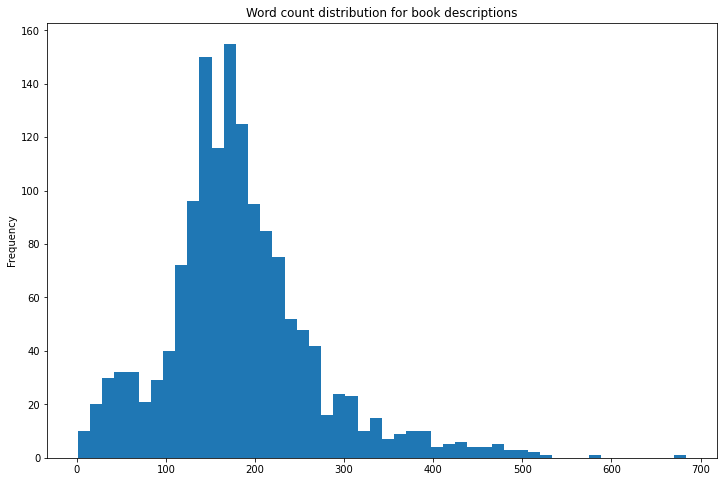

In [ ]:
count = CB_data['description'].apply(lambda x: len(str(x).split()))
count.plot(kind ='hist',bins = 50, figsize=(12,8),title = "Word count distribution for book descriptions")

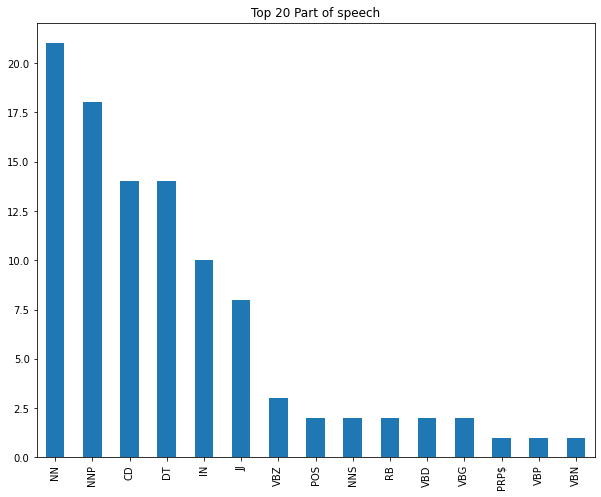

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(CB_data['description']))
pos = pd.DataFrame(blob.tags, columns = ['word','pos'])
pos = pos.pos.value_counts()[:20]
pos.plot(kind = 'bar',figsize=(10,8),title = "Top 20 Part of speech")

## Text preprocessing

In [ ]:
corpus=[]
for i in range(len(CB_data)):
  desc = re.sub('[^a-zA-Z]', ' ', CB_data['description'][i])
  desc = desc.lower()
  desc = desc.split()
  all_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()
  desc = [lemmatizer.lemmatize(word) for word in desc if not word in set(all_stopwords)]
  desc = ' '.join(desc)
  corpus.append(desc)

## TFIDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (2,2))
trans = tfidf.fit_transform(corpus).toarray()
trans

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# total_words = trans.sum(axis = 0)
# freq = [(word,total_words[0,idx]) for word, idx in tfidf.vocabulary_.items()]
# freq = sorted(freq,key=lambda x:x[1], reverse=True)
# bigram = pd.DataFrame(freq)
# bigram.rename(columns = {0:'biagram',1:'count'},inplace=True)
# bigram.head(20)
# bigram.plot(x='biagram',y = 'count', kind = 'bar',title = 'Bigram distribution for top 20 words in the description')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(description.genres)
y = y.reshape(-1,1)

In [ ]:
# pca = PCA(n_components = 2)
# y = pca.fit_transform(y)

Text(0, 0.5, 'wcss')

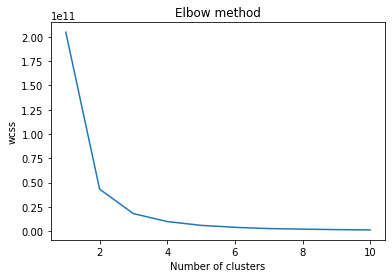

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

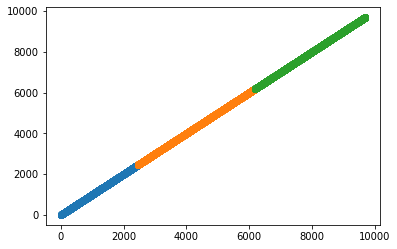

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1, random_state=100)
y_kmeans = kmeans.fit_predict(y)
plt.scatter(y[y_kmeans==0],y[y_kmeans==0])
plt.scatter(y[y_kmeans==1],y[y_kmeans==1])
plt.scatter(y[y_kmeans==2],y[y_kmeans==2])
# plt.scatter(trans_pca[y_kmeans==3,0],trans_pca[y_kmeans==3,1])
# plt.scatter(trans_pca[y_kmeans==4,0],trans_pca[y_kmeans==4,1])
y_kmeans

## Content based recommendation

In [ ]:
def CB_recommend(title, tfidf = trans, data = CB_data, no_of_recommend=5):
  cos_sim = cosine_similarity(tfidf,tfidf)
  try:
    idx = data[data['title'].str.contains(title)].index.values[0]
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)
    top_5_indexes = list(score_series.iloc[1:no_of_recommend+1].index)
    recommend = data[['title','image_url']].iloc[top_5_indexes]
    for i in recommend['image_url']:
      response = requests.get(i)
      img = Image.open(BytesIO(response.content))
      plt.figure()
      print(plt.imshow(img))
    return data[['title']].iloc[top_5_indexes]
  except:
    return 'we don\'t have this book'

In [ ]:
CB_recommend('Harry Potter')

,title
1405,Harry Potter Schoolbooks Box Set: Two Classic ...
803,"Harry Potter Boxed Set, Books 1-5 (Harry Potte..."
865,"Harry Potter Collection (Harry Potter, #1-6)"
9,Harry Potter and the Prisoner of Azkaban (Harr...
1437,Summer of My German Soldier (Summer of My Germ...


# Colaborative filtering recommendation system

In [ ]:
df1 = books[['book_id','title','image_url']]
df1

,book_id,title,image_url
0,2767052,"The Hunger Games (The Hunger Games, #1)",https://images.gr-assets.com/books/1447303603m...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...
2,41865,"Twilight (Twilight, #1)",https://images.gr-assets.com/books/1361039443m...
3,2657,To Kill a Mockingbird,https://images.gr-assets.com/books/1361975680m...
4,4671,The Great Gatsby,https://images.gr-assets.com/books/1490528560m...
...,...,...,...
9995,7130616,"Bayou Moon (The Edge, #2)",https://images.gr-assets.com/books/1307445460m...
9996,208324,"Means of Ascent (The Years of Lyndon Johnson, #2)",https://s.gr-assets.com/assets/nophoto/book/11...
9997,77431,The Mauritius Command,https://images.gr-assets.com/books/1455373531m...
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...,https://images.gr-assets.com/books/1279214118m...


In [ ]:
CF_data = pd.merge(df1,rating,on = "book_id", how = 'inner')
CF_data

,book_id,title,image_url,user_id,rating
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,314,3
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,588,1
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2077,2
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2487,3
4,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2900,3
...,...,...,...,...,...
79696,8914,The First World War,https://images.gr-assets.com/books/1403194704m...,46715,4
79697,8914,The First World War,https://images.gr-assets.com/books/1403194704m...,47073,4
79698,8914,The First World War,https://images.gr-assets.com/books/1403194704m...,49663,3
79699,8914,The First World War,https://images.gr-assets.com/books/1403194704m...,50305,3


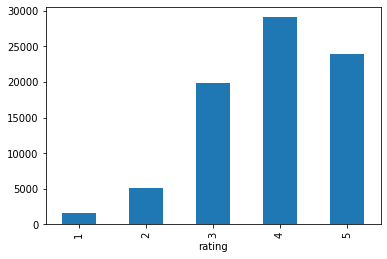

In [ ]:
CF_data.groupby('rating').count()['user_id'].plot.bar()

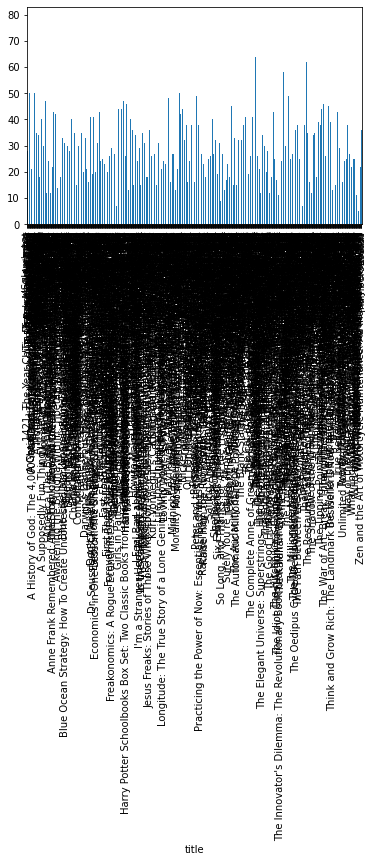

In [ ]:
plotting = CF_data[CF_data['rating'] > 4.5] 
plotting.groupby('title').count()['user_id'].plot.bar()

In [ ]:
CF_data.drop("book_id",axis = 1, inplace = True)
CF_data

,title,image_url,user_id,rating
0,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,314,3
1,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,588,1
2,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2077,2
3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2487,3
4,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,2900,3
...,...,...,...,...
79696,The First World War,https://images.gr-assets.com/books/1403194704m...,46715,4
79697,The First World War,https://images.gr-assets.com/books/1403194704m...,47073,4
79698,The First World War,https://images.gr-assets.com/books/1403194704m...,49663,3
79699,The First World War,https://images.gr-assets.com/books/1403194704m...,50305,3


In [ ]:
reader = Reader(rating_scale =(1,5))
data = Dataset.load_from_df(CF_data[["user_id","title","rating"]], reader)

In [ ]:
benchmark = []

for algorithm in [SVD(), NMF(), NormalPredictor(), CoClustering()]:
  results = cross_validate(algorithm,data,measures=['RMSE'],cv=3,verbose = False)
  tmp = pd.DataFrame.from_dict(results).mean(axis = 0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
  benchmark.append(tmp)



In [ ]:
algorithms_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
algorithms_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.916404,8.257005,0.577865
CoClustering,0.996304,2.600580,0.249246
NMF,1.061509,6.252444,0.192755
NormalPredictor,1.323335,0.082895,0.263986


In [ ]:
benchmark = []

for algorithm in [SVD(), NMF(), NormalPredictor(), CoClustering()]:
  results = cross_validate(algorithm,data,measures=['mae'],cv=3,verbose = False)
  tmp = pd.DataFrame.from_dict(results).mean(axis = 0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
  benchmark.append(tmp)



In [ ]:
algorithms_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_mae')
algorithms_results

,test_mae,fit_time,test_time
Algorithm,,,
SVD,0.734352,3.562444,0.258516
CoClustering,0.759922,4.651305,0.252651
NMF,0.836715,4.951729,0.282118
NormalPredictor,1.059552,0.089029,0.331304


In [ ]:
train, test = train_test_split(data, test_size = 0.25)
algorithm = SVD()
pred = algorithm.fit(train).test(test)
accuracy.rmse(pred)

RMSE: 0.9141


0.9140770308297166

In [ ]:
train = data.build_full_trainset()
algorithm = SVD()
algorithm.fit(train)
testset = train.build_anti_testset()
pred = algorithm.test(test)
acc = accuracy.rmse(pred)
pred

In [ ]:
def predict(pred):
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in pred:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
prediction = predict(pred)
prediction

In [ ]:
n = 5
for uid, user_ratings in prediction.items():
  user_ratings.sort(key=lambda x: x[1], reverse=True)
  prediction[uid] = user_ratings[:n]
prediction

In [ ]:
tmp = pd.DataFrame.from_dict(prediction, orient='index')
tmp_transpose = tmp.transpose()
tmp_transpose


,16291,27944,32568,10762,5426,45127,10140,4359,45971,39423,...,16309,46873,20147,8365,5274,34659,22217,9049,8915,47199
0,"(The Power and the Glory, 3.9477592122013028)","(The Lorax, 3.5310817320738583)","(Eats, Shoots & Leaves: The Zero Tolerance App...","(The Book of Ruth, 3.3002025687145435)","(The Firm (Penguin Readers, Level 5), 3.727039...","(Moloka'i, 3.479484773552016)","(In a Sunburned Country, 3.315361181867396)","(Vanity Fair, 3.9401902654770344)","(Where the Heart Is, 3.913713845593997)","(Heidi, 3.934047255744563)",...,"(The Winter of Our Discontent, 4.495567905231484)","(A History of God: The 4,000-Year Quest of Jud...",(Sickened: The Memoir of a Munchausen by Proxy...,"(Birdsong, 3.844163165949167)",(The Drama of the Gifted Child: The Search for...,"(Don Quixote, 4.49033192017034)","(Life of Pi, 3.7903805545863785)","(Raise High the Roof Beam, Carpenters & Seymou...","(The Heart of a Woman, 4.29420979621589)","(Three to Get Deadly (Stephanie Plum, #3), 4.4..."
1,"(Doctor No (James Bond, #6), 3.6556801804689703)",None,(Six Easy Pieces: Essentials of Physics By Its...,"(Martin Chuzzlewit, 3.2462250404428326)",None,None,(The Long Dark Tea-Time of the Soul (Dirk Gent...,None,None,"(About a Boy, 3.8296103605822416)",...,None,None,None,None,None,None,None,None,None,None
2,"(The Giver (The Giver, #1), 3.471234471794357)",None,None,"(The First World War, 2.5358830598416775)",None,None,"(Trump: The Art of the Deal, 3.108476213107352)",None,None,(Harry Potter and the Prisoner of Azkaban (Har...,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,(The Lost Continent: Travels in Small Town Ame...,None,None,"(The Odyssey, 2.7352574418631326)",...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,(Harry Potter and the Sorcerer's Stone (Harry ...,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
def CF_predictions(user_id,data =CF_data):
  result = tmp.iloc[user_id]
  CF_recommendations=[]
  result.dropna(inplace = True)
  for i in range(len(result)):
    x = data[data.title==result[i][0]]['image_url'].unique()
    response = requests.get(x[0])
    img = Image.open(BytesIO(response.content))
    plt.figure()
    print(plt.imshow(img)) 
    CF_recommendations.append(result[i][0])
  return CF_recommendations

In [ ]:
result = CF_predictions(50)
result

['From Beirut to Jerusalem']

# Interface

In [ ]:
import streamlit as st
header = st.container()
sreachRecomend = st.container()
productInfo = st.container()
simalerProduct = st.container()
desc = pd.read_csv("D:/DEBI/Uottawa/Data Science Application/Dataset/Goodreadss_Books.csv")
# desc.head()
books = pd.read_csv("D:/DEBI/Uottawa/Data Science Application/Project/books.csv")
# books.head()
rating = pd.read_csv("D:/DEBI/Uottawa/Data Science Application/Project/ratings.csv")
with header:
  #st.write("huihui")
    st.title("Read for happiness")
    data = st.text_input('Do you Have ID')
    if data=='yes' or  data == 'Yes':
      with st.form("EnterID"):
        ID=  st.text_input('Enter your ID please')
        submitted = st.form_submit_button("submit")
        if submitted:
           res = CF_predictions(int(ID))
           print(res)
           for i in res:
            st.write(i)
    elif data == 'no' or data == 'No':
        ID= st.text_input('Enter a book please')
        st.write(CB_recommend(ID))